# Describe ChIP library

In [82]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res=220)

In [5]:
library(tidyverse)

In [6]:
setwd("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/mouse_chip_mazzoni/")

```
File					ChIP		Replicate	Genotype
HJY7YBGX2_n01_ba65.fastq.gz		INPUT

H7KNHBGX3_n01_ba67.fastq.gz		Neurog2		1		iNeurog2 Wildtype
HL2NTBGX3_n01_ba108.fastq.gz		Neurog2		2		iNeurog2 Wildtype
			
HKLCTDRXX_n01_GG088.fastq.gz		Neurog2		1		iNeurog2 Zbtb18KO
HKLCTDRXX_n01_GG089.fastq.gz		Neurog2		2		iNeurog2 Zbtb18KO

HKLCTDRXX_n01_GG090.fastq.gz		Zbtb18		1		iNeurog2 Wildtype
HKLCTDRXX_n01_GG091.fastq.gz		Zbtb18		2		iNeurog2 Wildtype```

In [130]:
mouse.chip.library <- readxl::read_xlsx("chip_library_summary.xlsx", sheet = 1)
human.chip.library <- readxl::read_xlsx("chip_library_summary.xlsx", sheet = 2)

In [129]:
mouse.lookup <- tribble(~sample, ~name,
                       "ba65", "INPUT",
                       "ba67", "NGN2_WT.r1",
                       "ba108", "NGN2_WT.r2",
                       "GG088", "NGN2_KO.r1",
                       "GG089", "NGN2_KO.r2",
                       "GG090", "ZB18_WT.r1",
                       "GG091", "ZB18_WT.r2")

In [131]:
mouse.chip.library <- select(mouse.chip.library, -total_reads) %>%
                        mutate_at("sample", ~ str_extract(.x, pattern = '[bG][aG][0-9]{1,3}')) %>% 
                        rename("multi_aligned" = "smulti_aligned") %>%
                        pivot_longer(cols = c("unmapped", "uniquely_mapped", "multi_aligned"), names_to = "mapping", values_to = "reads") %>%
                        inner_join(mouse.lookup, by = "sample")

In [163]:
?geom_text

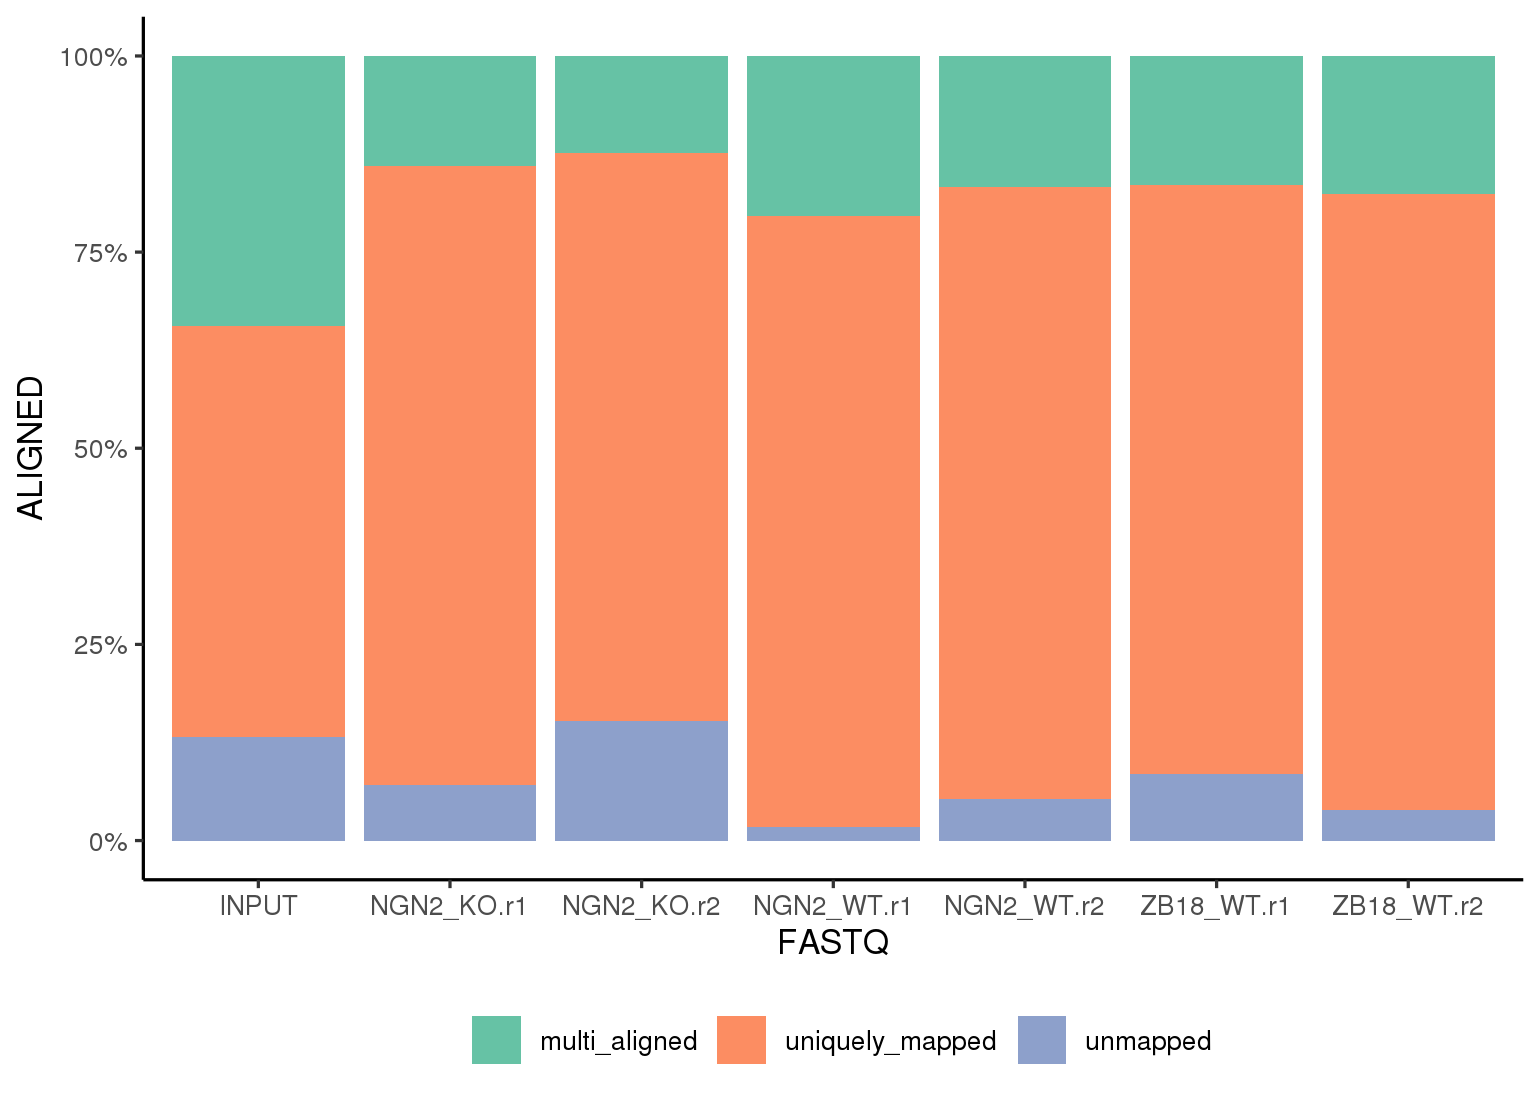

In [183]:
ggplot(mouse.chip.library) + geom_bar(aes(name, reads, fill = mapping), stat = "identity", position = "fill") + 
        theme_classic() +
        scale_y_continuous(labels = scales::percent) +
        scale_fill_brewer(type = "qual", palette = "Set2", name = NULL) +
        theme(legend.position = "bottom") +
        labs(x = "FASTQ", y = "ALIGNED")

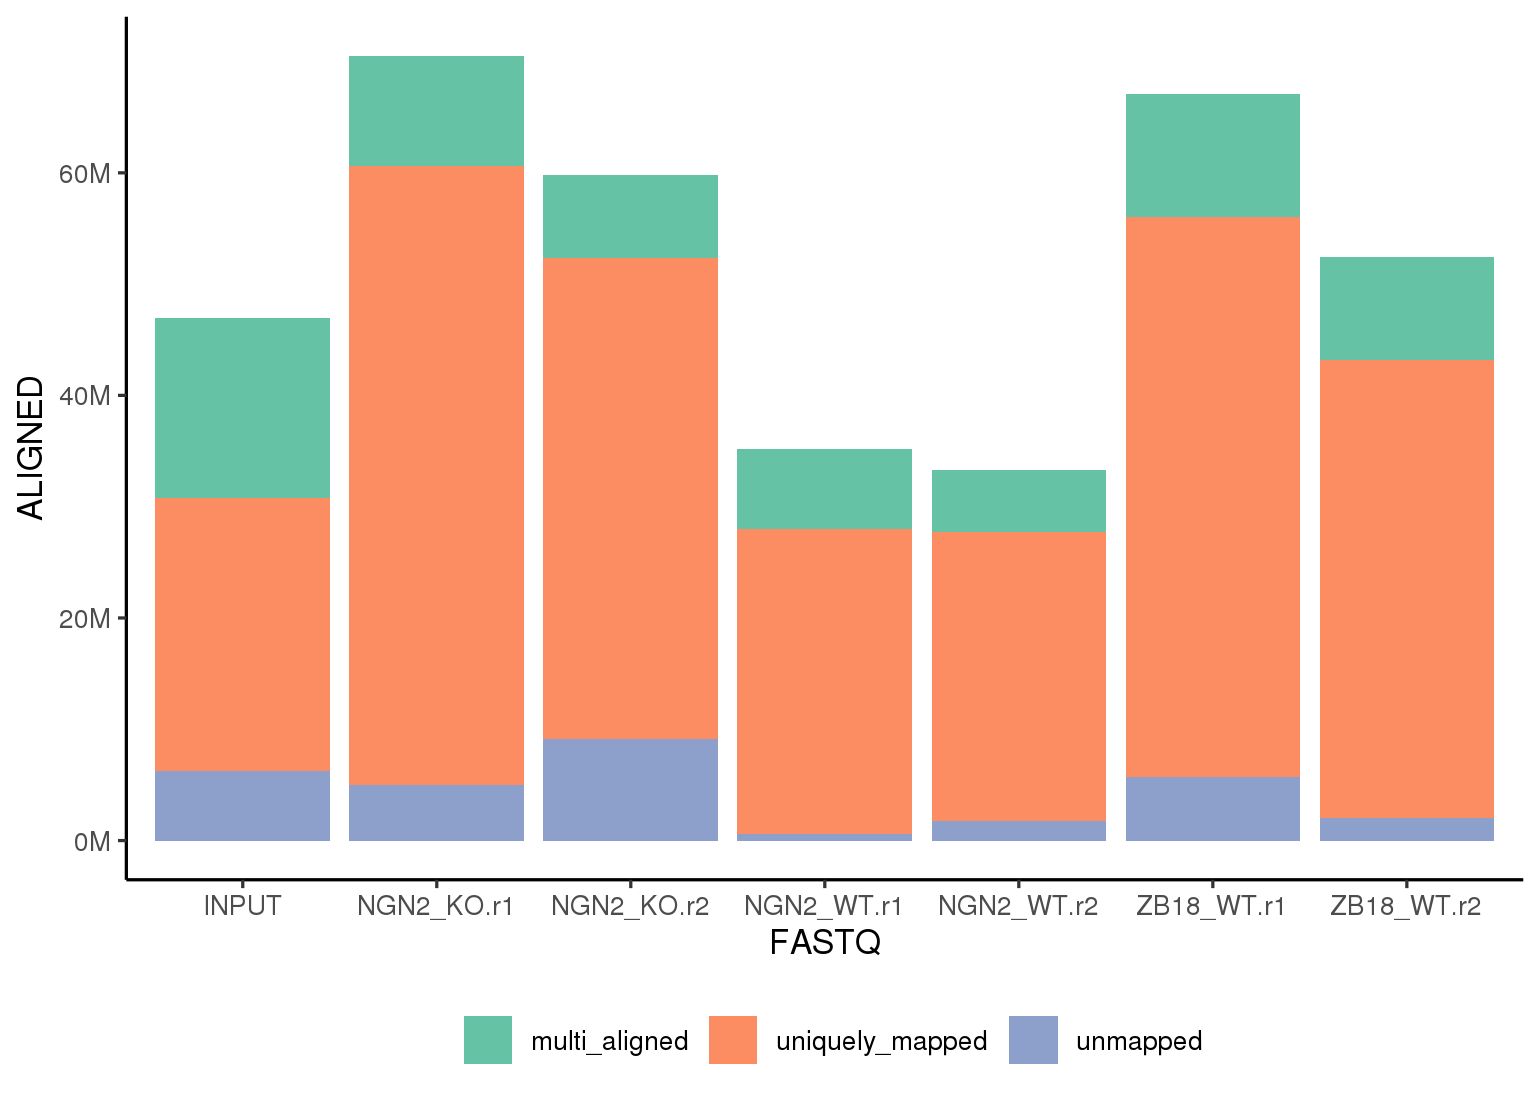

In [184]:
ggplot(mouse.chip.library) + geom_bar(aes(name, reads, fill = mapping), stat = "identity", position = "stack") +
        theme_classic() +
        scale_y_continuous(labels = scales::label_number(suffix = "M", scale = 1e-6)) +
        scale_fill_brewer(type = "qual", palette = "Set2", name = NULL) +
        theme(legend.position = "bottom") +
        labs(x = "FASTQ", y = "ALIGNED")

---

## human

In [186]:
human.chip.library <- select(human.chip.library, -total_reads) %>%
                        mutate_at("sample", ~ str_extract(.x, pattern = 'SRR[0-9]+')) %>% 
                        rename("multi_aligned" = "smulti_aligned") %>%
                        pivot_longer(cols = c("unmapped", "uniquely_mapped", "multi_aligned"), names_to = "mapping", values_to = "reads") 

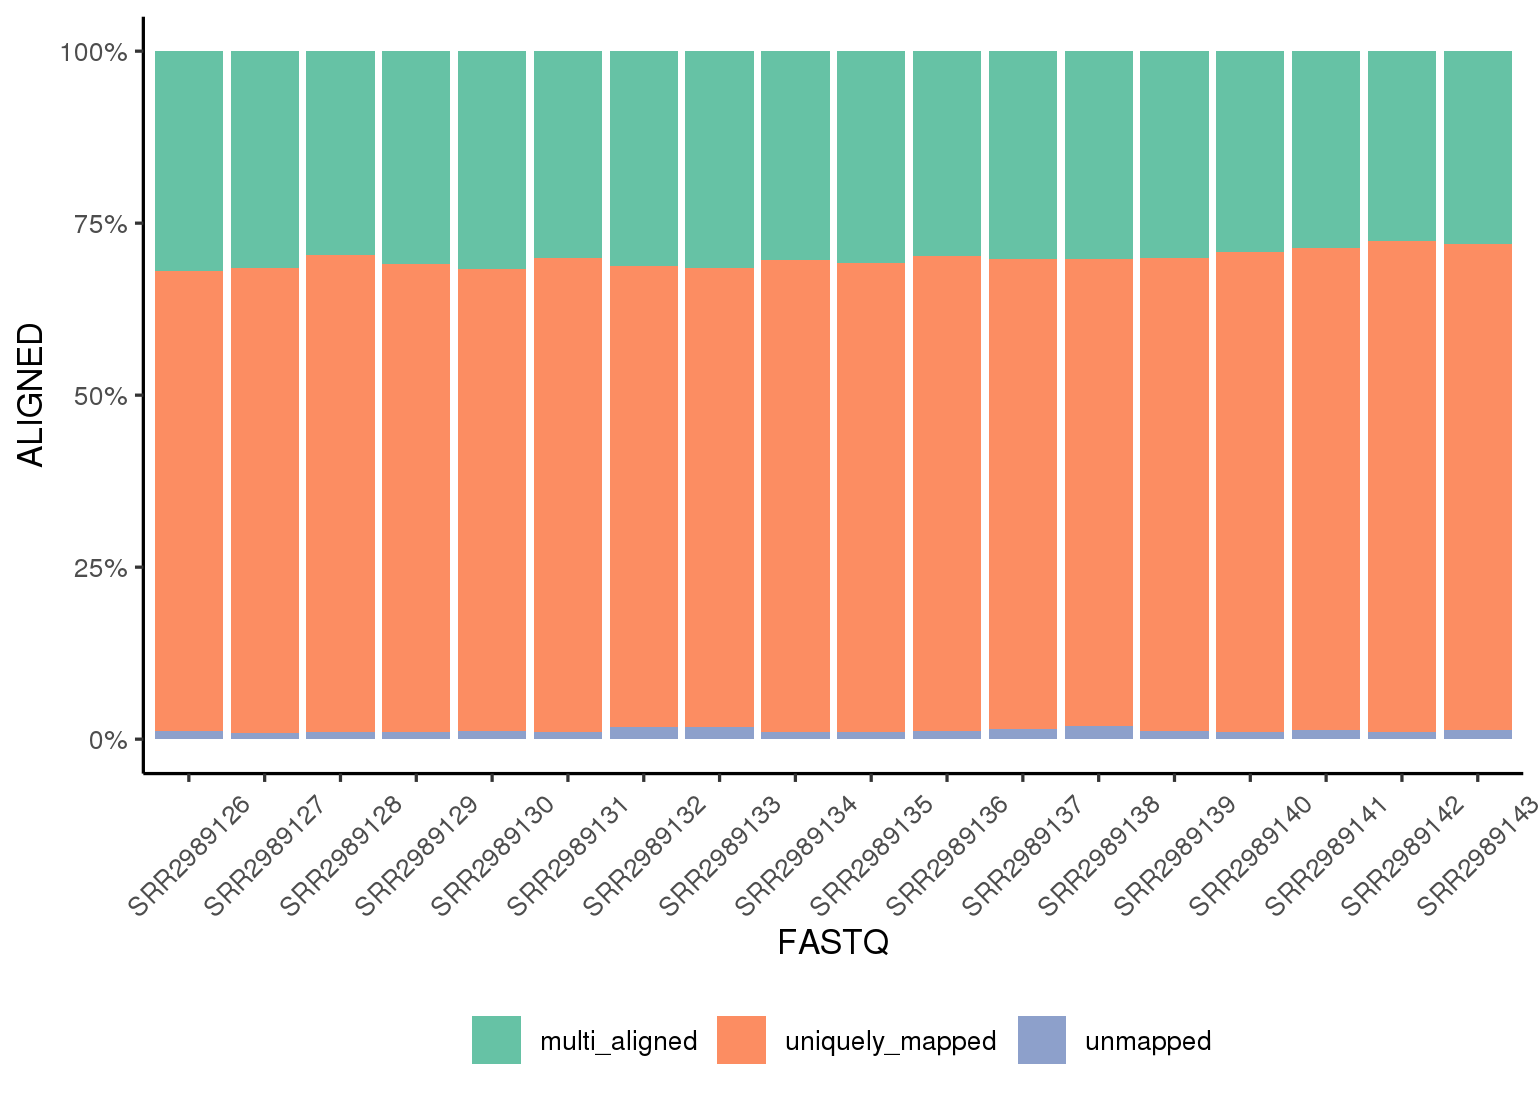

In [187]:
ggplot(human.chip.library) + geom_bar(aes(sample, reads, fill = mapping), stat = "identity", position = "fill") +
        theme_classic() +
        scale_y_continuous(labels = scales::percent) +
        scale_fill_brewer(type = "qual", palette = "Set2", name = NULL) +
        labs(x = "FASTQ", y = "ALIGNED") +
        theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, vjust=.5))

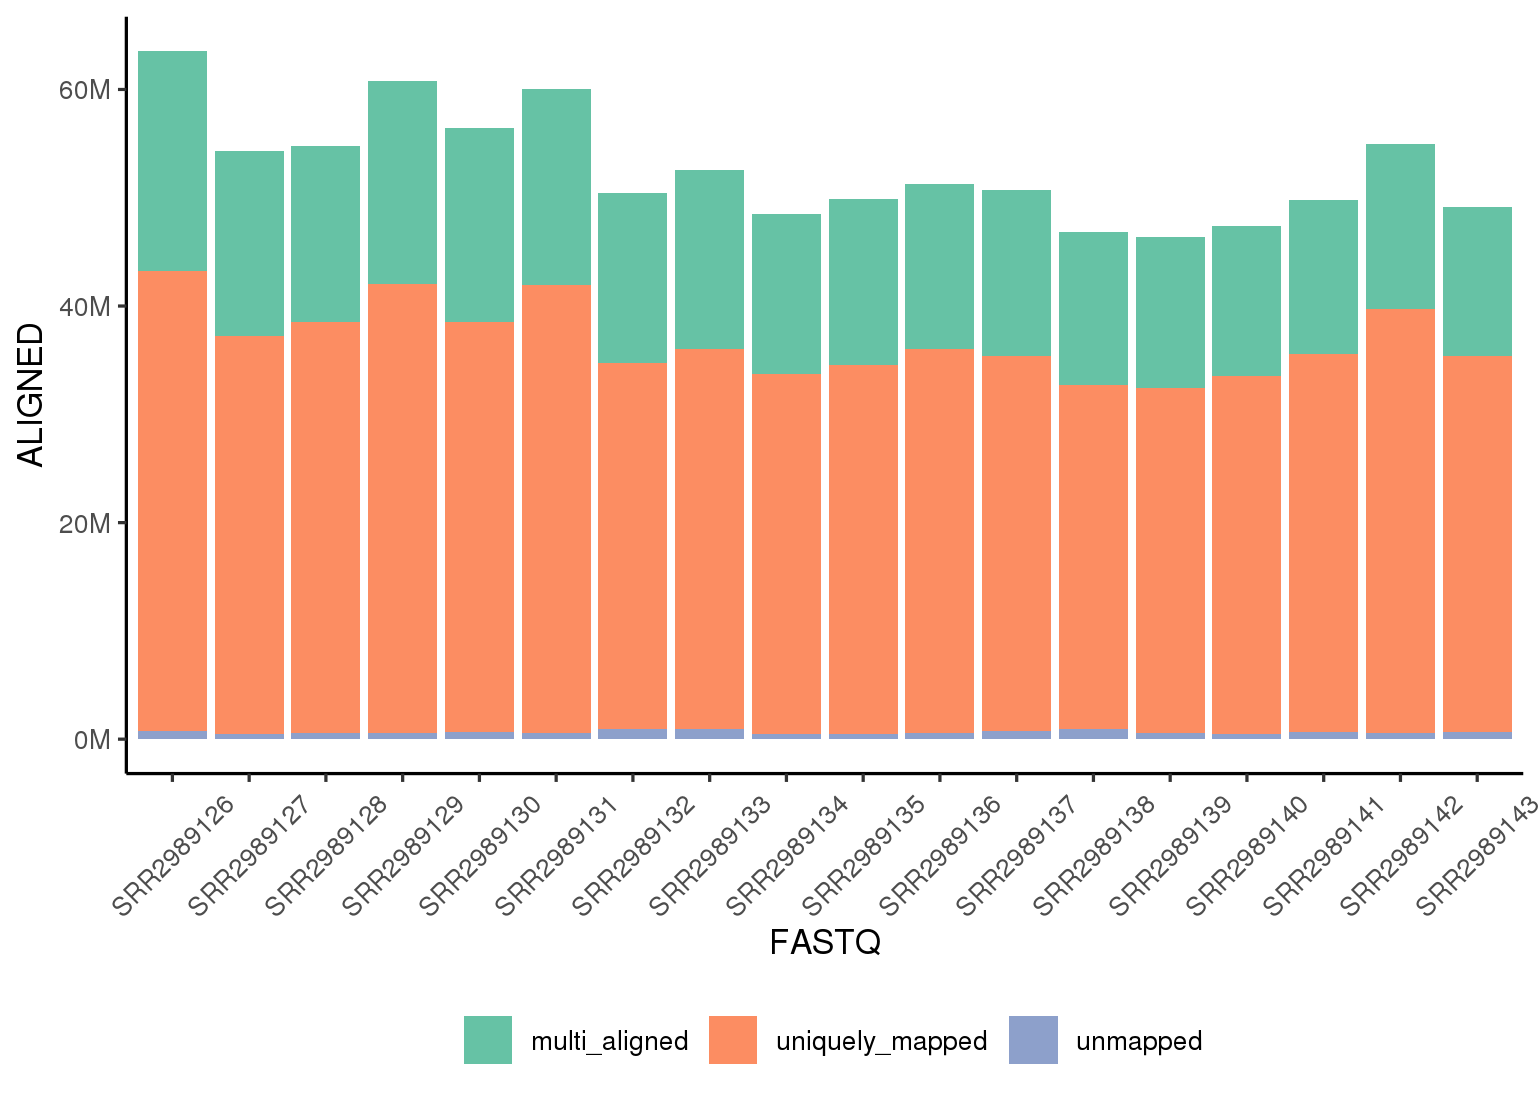

In [189]:
ggplot(human.chip.library) + geom_bar(aes(sample, reads, fill = mapping), stat = "identity", position = "stack") +
        theme_classic() +
        scale_y_continuous(labels = scales::number_format(suffix = "M", scale = 1e-6)) +
        scale_fill_brewer(type = "qual", palette = "Set2", name = NULL) +
        labs(x = "FASTQ", y = "ALIGNED") +
        theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, vjust=.5))